In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind

Know the course material for the mock interview including the 

Source of data https://archive.ics.uci.edu/ml/datasets/Adult

Research proposal https://courses.thinkful.com/data-201v1/project/1.4.5 Problem To predict wether a person makes over 50k per year.

Potential Solution Create an A/B test for specific columns against each other. The one group that is more successful at sorting out people that earn greater than 50k wins and will be tested against the next group/column. For example; testing for level of education against occupation. Or testing different levels of education against each other or types of occupations against each other.

Method of testing the potential solution A/B testing

Below I address the five key components of A/B Testing as follows: 

Q1. Does it have two versions?
Q2. Does it have a sample that can be divided into two groups?
Q3. What is your intention, do you have a hypothesis, what do you expect to happen?
Q4. What is your outcome of interest? What is your key metric to measure this over time?
Q5. Other variables that make sure the sample groups are similar. 

A1. Yes, I am focusing on the age of the people being tested. There are old and there are young. These groups can be seperated into an age below 40 and one above 40. 

A2. Furthermore these two groups can be divided into those that earn more than 50K/year and those that earn less than 50k/year. I hope to see an increase in income over time across all ages. I hythotesize that the income earned at an older ages is higher than that at a younger ages regrdless of any other variable. Mostly because younger people have more time to earn money and older people have less time. I also think that because of this older people have a more difficult time rising to a higher income level. I want to find the point at which this generally happens. Then move on to applying this method to race, workclass, and sex.

A3. My intention is to discover which age one switches over into the higher income bracket. 

A4. The most important part in this process IMHO is to decide on how to measure the results. The key metric to track is income over time to keep it simple at the moment. 

A5.Other variables that are important to consider are demographics of the sample I mentioned earlier, enviornmental effects. But the only one that I seem to need is that they are all humans, people.

Narrative Analytics and experimentation

Previously we've asked you to look into a dataset to ask and answer a series of questions. You are now ready for the next step in that process.

First, dive in and explore the data set. Include your code and visuals from this process in your final write up. While doing this, look for something that provokes a question; specifically one that can be answered with an experiment.

The main component of this capstone is a research proposal. Using the data set you selected, propose and outline an experiment plan. The plan should consist of three key components:

1. Analysis that highlights your experimental hypothesis.
2. A rollout plan showing how you would implement and rollout the experiment
3. An evaluation plan showing what constitutes success in this experiment

Your experiment should be as real as possible. Though you obviously will not have access to the full production environment to deploy your experiment, it should be feasible and of interest to the parties involved with your actual data source.

The target size of your research proposal should be 3-5 pages.

Good Luck!

Oh, and when you're done don't forget to have your mentor mark the goal as complete, which should let you schedule your first mock interview!

My buring question is this: Which age group earns more, at which age do people start to earn more than 50k? What trends exist if I were to divide the dataset into two age groups. What story does income graphes over time, tell? Which two age should I choose, whihc groups are testable and show correlation and significant statistical support in order to begin answering these questions?

In [3]:
l = ["age", 'workclass', "fmlwgt", 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Income level']

In [4]:
df = pd.read_csv("/Users/bradleyrhyins/Downloads/adult.csv", names = l)

In [5]:
df.head()

,age,workclass,fmlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income level
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
df_private = df[df['workclass'] == " Private" ]
df_self_emp = df[df['workclass'] == " Self-emp-not-inc"]
df_fed = df[df['workclass'] == " Federal-gov"]
df_local = df[df['workclass'] == " Local-gov"]
df_nw = df[df['workclass'] == " Never- worked"]
df_state_gov = df[df['workclass'] == " State-gov"]
df_without_pay = df[df['workclass'] == " Without-pay"]
df_self_emp_not_inc = df[df['workclass'] == " Self-emp-not-inc"]

set(df["workclass"])

{' ?',
 ' Federal-gov',
 ' Local-gov',
 ' Never-worked',
 ' Private',
 ' Self-emp-inc',
 ' Self-emp-not-inc',
 ' State-gov',
 ' Without-pay'}

(array([  177.,   266.,   811.,   695.,  1256.,  7780.,  6099.,   729.,
         4445.,   438.]),
 array([  1. ,   2.5,   4. ,   5.5,   7. ,   8.5,  10. ,  11.5,  13. ,
         14.5,  16. ]),
 <a list of 10 Patch objects>)

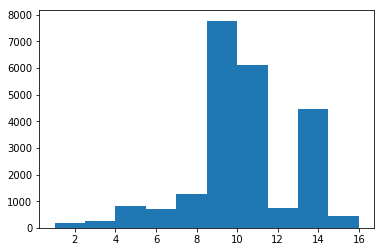

In [7]:
#add labels
plt.hist(df_private["education-num"])

(array([   32.,    94.,   101.,    60.,    19.,  1352.,   108.,   470.,
          124.,   181.]),
 array([  2. ,   3.4,   4.8,   6.2,   7.6,   9. ,  10.4,  11.8,  13.2,
         14.6,  16. ]),
 <a list of 10 Patch objects>)

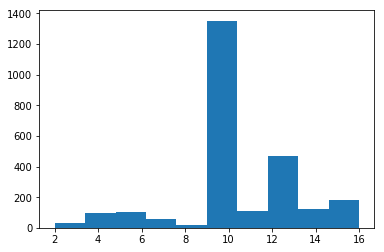

In [10]:
plt.hist(df_self_emp["education-num"])

In [9]:
sample1 = df_private["education-num"]
sample2 = df_self_emp["education-num"]

size = np.array([len(sample1), len(sample2)])

sd = np.array([sample1.std(), sample2.std()])

diff=sample2.mean( ) -sample1.mean()
diff_se = (sum(sd ** 2 / size)) ** 0.5

print(diff/diff_se)

6.04228927496


In [8]:
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=6.042289274961508, pvalue=1.7052584559347813e-09)


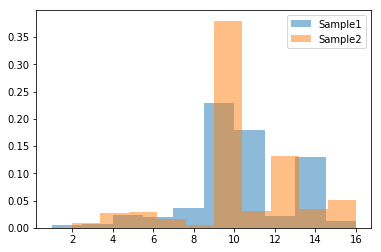

In [9]:
plt.hist(sample1, alpha=0.5, label='Sample1',normed=True) 
plt.hist(sample2, alpha=0.5, label='Sample2',normed=True) 
plt.legend(loc='upper right') 
plt.show()

In [10]:
print(df_private)

       age workclass  fmlwgt      education  education-num  \
2       38   Private  215646        HS-grad              9   
3       53   Private  234721           11th              7   
4       28   Private  338409      Bachelors             13   
5       37   Private  284582        Masters             14   
6       49   Private  160187            9th              5   
8       31   Private   45781        Masters             14   
9       42   Private  159449      Bachelors             13   
10      37   Private  280464   Some-college             10   
12      23   Private  122272      Bachelors             13   
13      32   Private  205019     Assoc-acdm             12   
14      40   Private  121772      Assoc-voc             11   
15      34   Private  245487        7th-8th              4   
17      32   Private  186824        HS-grad              9   
18      38   Private   28887           11th              7   
20      40   Private  193524      Doctorate             16   
21      

In [24]:
df_adm_clerical = df[df['occupation'] == " Adm-clerical"]
df_armed_forces = df[df['occupation'] == " Armed-Forces"]
df_craft_repair = df[df['occupation'] == " Craft-repair"]
df_exec_managerial

set(df["occupation"])

{' ?',
 ' Adm-clerical',
 ' Armed-Forces',
 ' Craft-repair',
 ' Exec-managerial',
 ' Farming-fishing',
 ' Handlers-cleaners',
 ' Machine-op-inspct',
 ' Other-service',
 ' Priv-house-serv',
 ' Prof-specialty',
 ' Protective-serv',
 ' Sales',
 ' Tech-support',
 ' Transport-moving'}

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

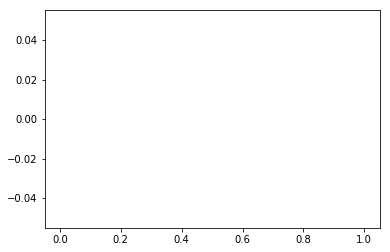

In [23]:
plt.hist(df_u50k["education-num"])

In [11]:
len(df_private)

22696

In [12]:
len(df_self_emp)

2541

In [13]:
len(df)

32561

In [14]:
print(df.columns)

Index(['age', 'workclass', 'fmlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income level'],
      dtype='object')


age: continuous. 

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 

fnlwgt: continuous. 

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 

1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

education-num: continuous. 

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, 

Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

sex: Female, Male. 

capital-gain: continuous. 

capital-loss: continuous. 

hours-per-week: continuous. 

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
#Creating multiple data frames for each variable that needs fleshing out

df_male = df[df['sex'] == 'Male']
df_female = df[df['sex'] == 'Female']
ttest_ind(df_male[' ... '], df_female[" ... "])


NameError: name 'df' is not defined

In [ ]:
plt.hist(df_private["education-num099-------"])